<h1><center> Problem Statement </center></h1>
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Approach
1. Importing Data
2. Inspecting the Dataframe
3. Data Preparation (Encoding Categorical Variables, Handling Null Values)
4. EDA (univariate analysis, outlier detection, checking data imbalance)
5. Dummy Variable Creation
6. Test-Train Split
7. Feature Scaling
8. Looking at Correlations
9. Model Building (Feature Selection Using RFE, Improvising the model further inspecting adjusted R-squared, VIF and p-vales)
10. Build final model
11. Model evaluation with different metrics Sensitivity, Specificity

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

## Importing Data

In [2]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the Dataframe

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Deleting the columns which are of no use to us for the analysis
delete_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']

leads=leads.drop(delete_cols,1)

In [7]:
#Verifying if the columns were deleted or not
leads.shape

(9240, 31)

In [8]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


#### We can see that there are some columns with Select as the input so we will change the select input to null value as it is of no use to us.

In [9]:
# Replacing 'Select' label with NaN values
leads=leads.replace('Select',np.nan)

In [10]:
# Check for missing values
round(leads.isnull().sum()/len(leads)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Columns with more than 30% of missing values should be dropped as it will lead to misleading results and hamper our conclusion.

In [11]:
#Dropping Columns
drop_cols=leads.isnull().sum()
drop_cols=drop_cols[drop_cols.values/len(leads)>0.30]
len(drop_cols)

9

In [12]:
# Dropping 9 columns and checking the remaining columns for missing values
drop_columns=list(drop_cols.keys())
leads=leads.drop(drop_columns,1)  
round(leads.isnull().sum()/len(leads)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

#### The columns with more than 30% of missing values have been dropped.
#### Columns with less than 30% of missing values, we will impute the mode to the null values.

In [13]:
# Checking the Lead Source value counts
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
testone                 1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

#### Google is having the highest number of occurences, hence we will impute the missing values with label 'Google' and also there are two google in the list just the letter 'g' is not capitalised so we would amend it too.

In [14]:
# TotalVisits column
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

#### 0.0 is the highest number of occurences, hence we will impute the missing values with label '0.0'.

In [15]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [16]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Email Opened is having highest number of occurences, hence we will impute the missing values with label 'Email Opened'

In [17]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Unemployed is having highest number of occurences, hence we will impute the missing values with label 'Unemployed'

In [18]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Better Career Prospects is having highest number of occurences, hence we will impute the missing values with label 'Better Career Prospects'

In [19]:
# Now, imputing the missing values dataset for respective categories
missing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}
leads=leads.fillna(value=missing_values)

In [20]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

#### All our missing values have been imputed

In [21]:
# Applying lambda function to capitalize the first character of the column 'Lead Source' to convert the letter 'g'.
leads['Lead Source']=leads['Lead Source'].apply(lambda x:x.capitalize())
leads['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Testone                 1
Welearnblog_home        1
Youtubechannel          1
Welearn                 1
Blog                    1
Nc_edm                  1
Name: Lead Source, dtype: int64

#### Now, we are done with cleaning the Dataset.

## Data Transformation

In [22]:
# We need to convert categorical variables to numerical variables
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content']:
    leads[feature] = leads[feature].apply(lambda x : 1 if x=='Yes' else 0)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,API,Olark chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,Email Opened
3,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified


In [23]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [24]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [25]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,1,0,0,0,0,0,0,0


#### Removing the duplicate or repeated columns.

In [26]:
# We have created dummies for below categories hence removing the original column
duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']
leads=leads.drop(duplicates,1)
leads.shape

(9240, 77)

In [27]:
# Dropping redundant variables
redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']
leads=leads.drop(redundant,1)

In [28]:
# Converting some categories to numerical as they are imported as an 'Object'
leads['TotalVisits']=leads['TotalVisits'].astype('float')
leads['Page Views Per Visit']=leads['Page Views Per Visit'].astype('float')
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

#### Now you can see that you have all variables as numeric.

## Checking for Outliers

In [29]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,0.000108,...,0.000108,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108
std,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,0.010403,...,0.010403,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,1.000000,0.000000,1.000000,17.000000,1840.610000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


#### As we can see there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

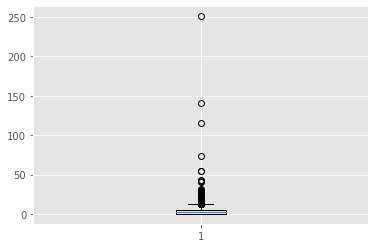

In [30]:
plt.boxplot(leads['TotalVisits'])
plt.show()

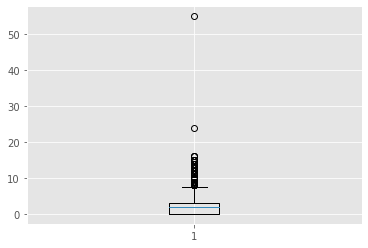

In [31]:
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

#### So, both these variables are outlier variables but for our analysis we can't drop them as it can impact our analysis so we will create bins for these two outliers.

In [32]:
# For 'TotalVisits' variable
# As we have range from 0 to 251 for'TotalVisits' variable
ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}
# Assigning '1' or '0' to each bins
for i in range(len(list(ranges_total_visits.keys()))):
    leads[list(ranges_total_visits.keys())[i]]=leads['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [33]:
# For 'Page Views Per Visit' variable
# As we have range from 0 to 55 for'Page Views Per Visit' variable
ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}
# Assigning '1' or '0' to each bins
for i in range(len(list(ranges_total_visits_1.keys()))):
    leads[list(ranges_total_visits_1.keys())[i]]=leads['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

#### Creating bins helped us remove the outliers and now we will remove the redundant columns.

In [34]:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']
leads=leads.drop(redundant,axis=1)
leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## Data Preparation 

### Train-Test split

In [35]:
#Separating the target variable from the dependent variable
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [36]:
#Putting dependent variable in a new dataset called 'X'
X=leads.drop('Converted',1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [37]:
# Splitting the datset into train and test dataset
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Standardization


In [38]:
# Creating an object
scaler=StandardScaler()  

In [39]:
# Now, Scaling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [40]:
## Checking the conversion rate from 'converted' column as it denotes the target variable
(sum(y)/len(y.index))*100

38.53896103896104

#### The conversion rate is almost 39%

### Correlation of the dataset

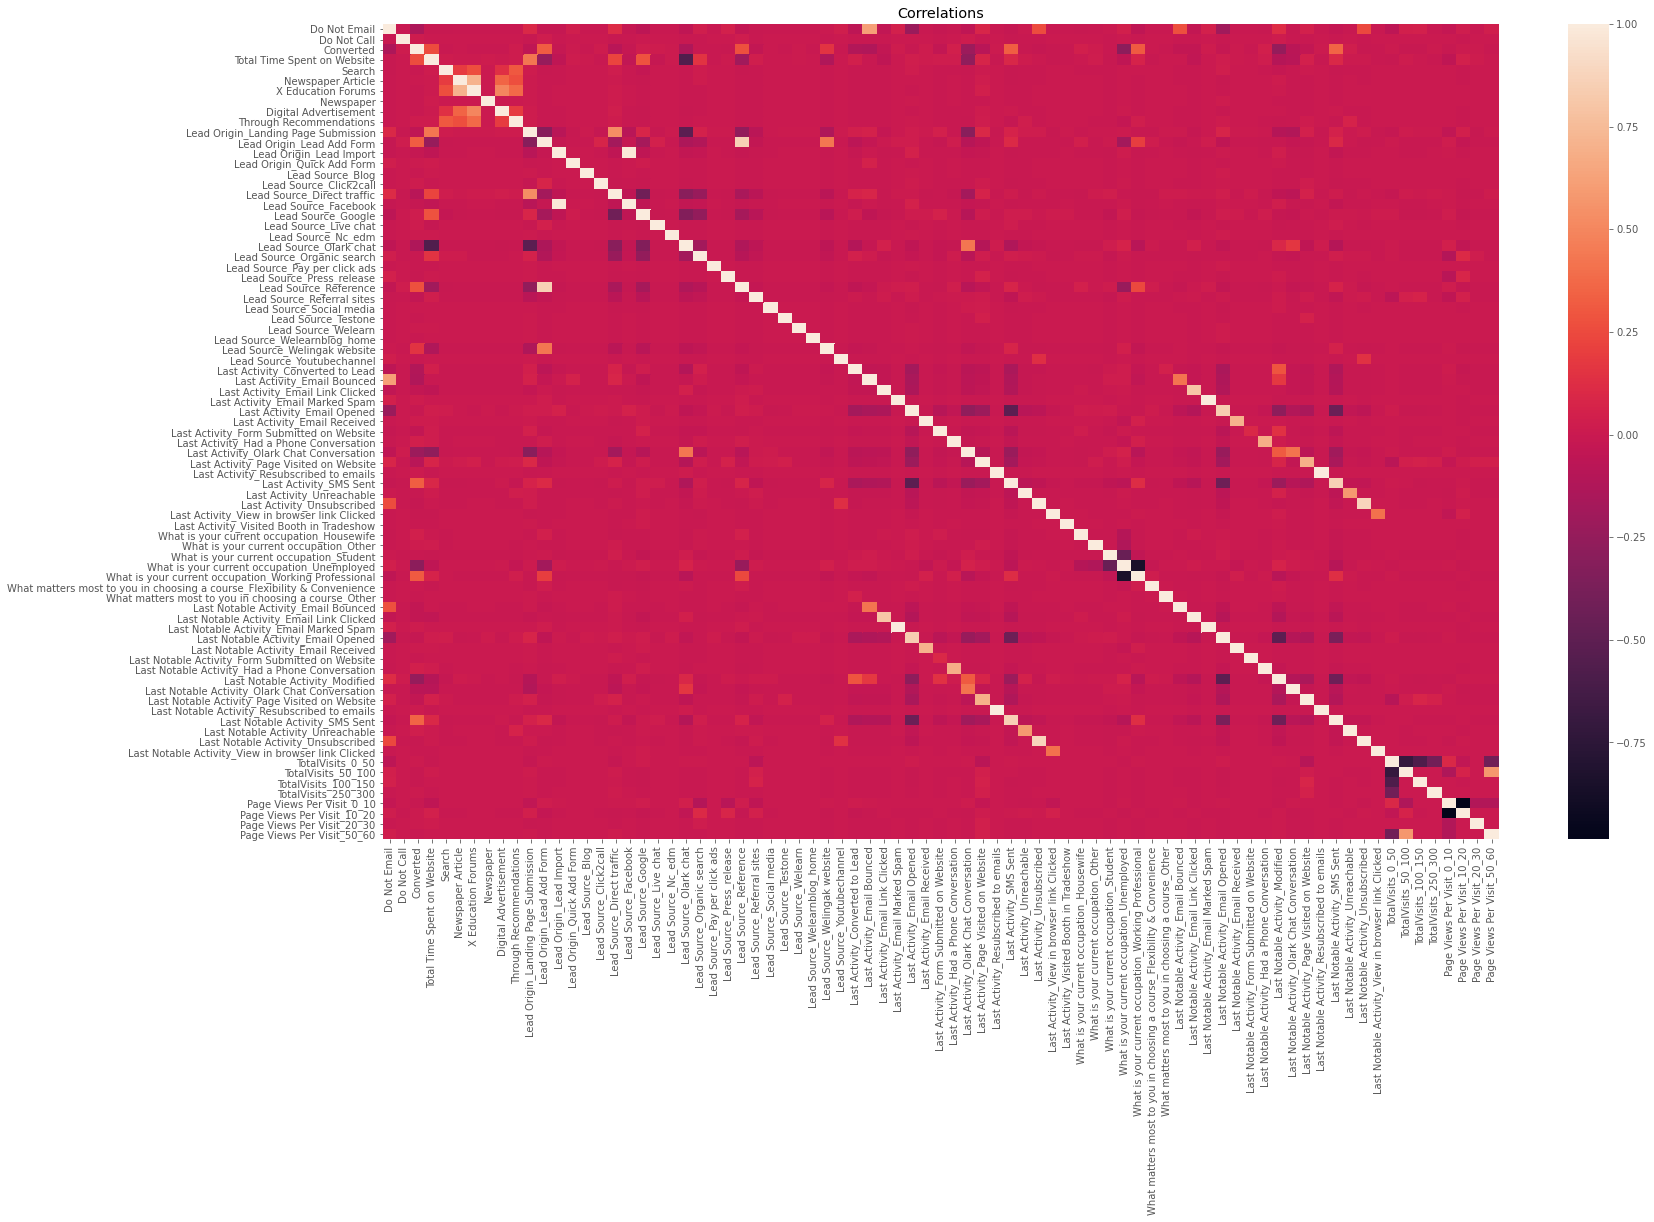

In [41]:
# setting the figure size
plt.figure(figsize=(25,15))
# setting the title
plt.title('Correlations')
# Plotting a heatmap
sns.heatmap(leads.corr(method='spearman'))
plt.show()

#### From the above heatmap, we can see that there are two variables with very high correlation, so we need to drop them before our model building

### Dropping highly correlated dummy variable

In [42]:
corr_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']
# dropping from X train set
X_train=X_train.drop(corr_dummy,1)      
# dropping from X test set
X_test=X_test.drop(corr_dummy,1)       

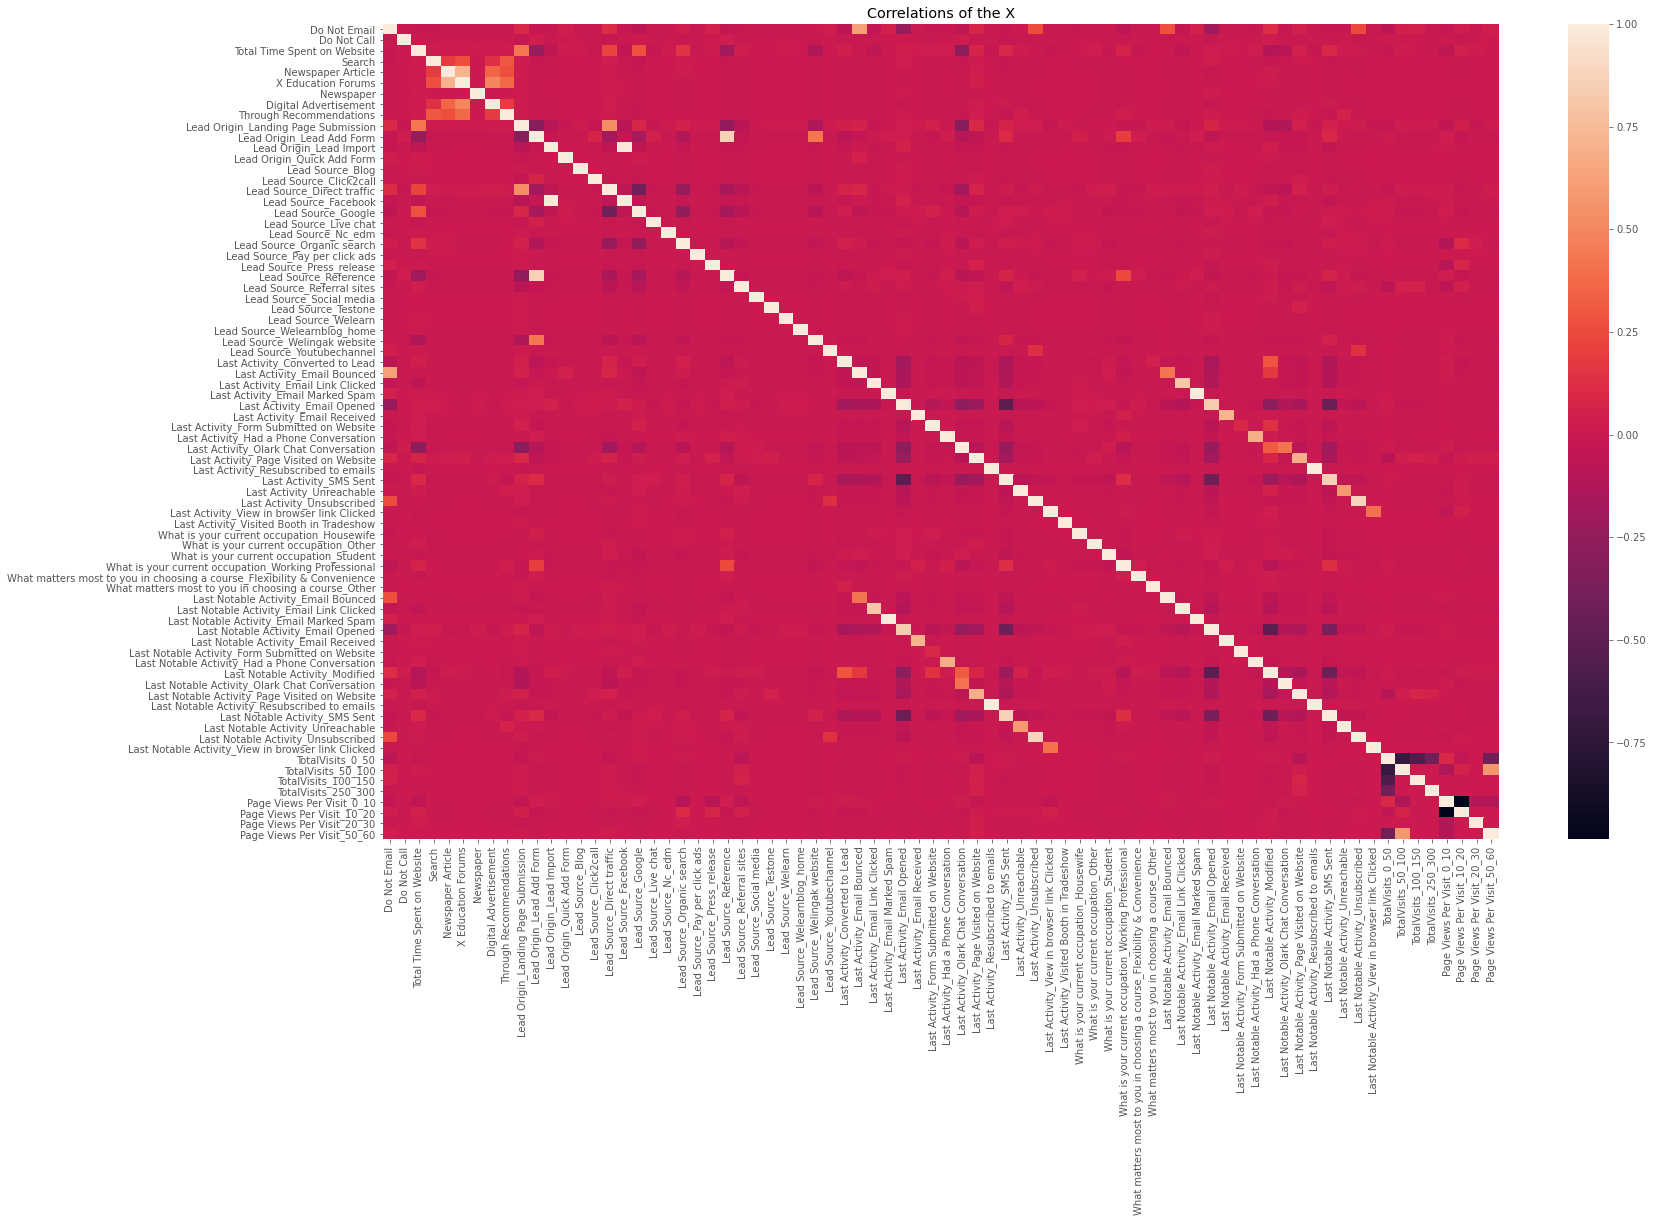

In [43]:
#Checking again the correlation of the dataset
plt.figure(figsize=(25,15))
plt.title('Correlations of the X')
sns.heatmap(leads[X_train.columns].corr(method='spearman'))
plt.show()

#### Both of them are removed and new correlation is received, we will proceed with building our model based on the p-values and VIFs, and will check again for correlation as from above heatmap it is difficult to spot the highly correlated variables.

## Building a Model

In [44]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Gaussian   Df Model:                           69
Link Function:               identity   Scale:                         0.13679
Method:                          IRLS   Log-Likelihood:                -2708.7
Date:                Sun, 16 Jan 2022   Deviance:                       875.08
Time:                        23:44:00   Pearson chi2:                     875.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.8081      0.147      5.513      0.000       0.521       1.095
Do Not Email                                                               -0.1237      0.025     -5.047      0.000      -0.172      -0.076
Do Not Call                                                                 0.4896      0.262      1.869      0.062      -0.024       1.003
Total Time Spent on Website                                                 0.1835      0.005     35.231      0.000       0.173       0.194
Search                                                                      0.0879      0.121      0.724      0.469      -0.150       0.326
Newspaper Article                                                           0.6322      0.371      1.706      0.088      -0.094       1.358
X Education Forums                                                         -0.7041      0.611     -1.153      0.249      -1.901       0.493
Newspaper                                                                  -0.6868      0.370     -1.855      0.064      -1.412       0.039
Digital Advertisement                                                      -0.3821      0.262     -1.459      0.145      -0.895       0.131
Through Recommendations                                                     0.1414      0.157      0.899      0.369      -0.167       0.450
Lead Origin_Landing Page Submission                                        -0.0250      0.014     -1.844      0.065      -0.052       0.002
Lead Origin_Lead Add Form                                                   0.4841      0.071      6.793      0.000       0.344       0.624
Lead Origin_Lead Import                                                     0.1788      0.264      0.676      0.499      -0.339       0.697
Lead Origin_Quick Add Form                                                  0.3403      0.371      0.916      0.359      -0.388       1.068
Lead Source_Blog                                                           -0.4794      0.370     -1.294      0.196      -1.205       0.246
Lead Source_Click2call                                                     -0.1588      0.226     -0.704      0.482      -0.601       0.283
Lead Source_Direct traffic                                                 -0.1737      0.020     -8.662      0.000      -0.213      -0.134
Lead Source_Facebook                                                       -0.3494      0.265     -1.320      0.187      -0.868       0.169
Lead Source_Google                                                         -0.1200      0.017     -7.037      0.000      -0.153      -0.087
Lea

#### There are so many variable with insignificant p-values. Here, we will have to use RFE for feature selection as we have 70 variables and checking one by one is not an efficient way to do so!

### Using RFE

In [45]:
logreg=LogisticRegression() #creating an object

## Running RFE with two different variables count to find best model

### RFE Test - 1

In [46]:
# Running rfe for 19 variables
rfem = RFE(logreg,19)
# Fitting 
rfem = rfem.fit(X_train,y_train)

In [47]:
#Checking for true and false assigned to the variables after rfe
rfem.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [48]:
#Selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model
col=X_train.columns[rfem.support_]
# Adding constant
X_train_1=sm.add_constant(X_train[col])

In [49]:
#Creating 1st model after RFE
logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=logis1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.1
Date:                Sun, 16 Jan 2022   Deviance:                       5358.3
Time:                        23:44:10   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1701      0.104     11.259      0.000       0.966       1.374
Do Not Email                                            -1.2346      0.193     -6.382      0.000      -1.614      -0.855
Total Time Spent on Website                              1.0853      0.039     27.645      0.000       1.008       1.162
Lead Origin_Lead Add Form                                2.7400      0.195     14.053      0.000       2.358       3.122
Lead Source_Direct traffic                              -1.2903      0.114    -11.343      0.000      -1.513      -1.067
Lead Source_Google                                      -0.9024      0.107     -8.460      0.000      -1.111      -0.693
Lead Source_Organic search                              -1.0645      0.132     -8.043      0.000      -1.324      -0.805
Lead Source_Referral sites                              -1.1262      0.312     -3.605      0.000      -1.739      -0.514
Lead Source_Welingak website                             1.8681      0.744      2.512      0.012       0.410       3.326
Last Activity_Converted to Lead                         -1.0016      0.226     -4.435      0.000      -1.444      -0.559
Last Activity_Email Bounced                             -1.0933      0.345     -3.171      0.002      -1.769      -0.418
Last Activity_Olark Chat Conversation                   -1.1949      0.193     -6.182      0.000      -1.574      -0.816
What is your current occupation_Housewife               22.8758   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.7957      0.188     14.846      0.000       2.427       3.165
Last Notable Activity_Email Link Clicked                -1.8728      0.275     -6.818      0.000      -2.411      -1.334
Last Notable Activity_Email Opened                      -1.3280      0.087    -15.274      0.000      -1.498      -1.158
Last Notable Activity_Had a Phone Conversation           2.0560      1.105      1.861      0.063      -0.110       4.222
Last Notable Activity_Modified                          -1.7097      0.099    -17.196      0.000      -1.905      -1.515
Last Notable Activity_Olark Chat Conversation           -1.4494      0.374     -3.876      0.000      -2.182      -0.717
Last Notable Activity_Page Visited on Website           -1.5749      0.192     -8.219      0.000      -1.950      -1.199
========================================================================================================================
"""

#### We will remove some features which have high p-value and so are insignificant and continue to build new models so that all the features attain significant p-value

## Calculating VIF

In [50]:
#Creating VIF dataframe
vif=pd.DataFrame()
#Adding same features as the x_train dataset have
vif['Features']=X_train_1[col].columns
#Calculating VIFs
vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]
#Rounding the vif values
vif['VIF']=round(vif['VIF'],2)
#Sorting the vif values
vif=vif.sort_values(by='VIF',ascending=False)
#Viewing the dataset
vif

,Features,VIF
16,Last Notable Activity_Modified,2.58
0,Do Not Email,1.89
10,Last Activity_Olark Chat Conversation,1.82
9,Last Activity_Email Bounced,1.80
4,Lead Source_Google,1.79
3,Lead Source_Direct traffic,1.73
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.46
17,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.30


#### We can observe after calculating VIF that all the values are less than 5 so multicollinearity does not exist in the dataset.

In [51]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant
X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [52]:
# Creating a new model
# Adding constant
X_train_2=sm.add_constant(X_train_2)
# Using GLM, creating model
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())
# Fitting our model
reg2=logis2.fit()
# Showing the summary of the model created
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13833
Method:                          IRLS   Log-Likelihood:                -2770.9
Date:                Sun, 16 Jan 2022   Deviance:                       892.07
Time:                        23:44:10   Pearson chi2:                     892.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6560      0.015     43.729      0.000       0.627       0.685
Do Not Email                                            -0.1504      0.023     -6.609      0.000      -0.195      -0.106
Total Time Spent on Website                              0.1842      0.005     35.569      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4043      0.022     18.503      0.000       0.361       0.447
Lead Source_Direct traffic                              -0.1856      0.016    -11.910      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1245      0.015     -8.360      0.000      -0.154      -0.095
Lead Source_Organic search                              -0.1509      0.018     -8.238      0.000      -0.187      -0.115
Lead Source_Referral sites                              -0.1718      0.041     -4.232      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1848      0.043      4.262      0.000       0.100       0.270
Last Activity_Converted to Lead                         -0.1096      0.024     -4.548      0.000      -0.157      -0.062
Last Activity_Email Bounced                             -0.0636      0.033     -1.953      0.051      -0.127       0.000
Last Activity_Olark Chat Conversation                   -0.1395      0.020     -6.881      0.000      -0.179      -0.100
What is your current occupation_Working Professional     0.3435      0.018     19.021      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3005      0.036     -8.447      0.000      -0.370      -0.231
Last Notable Activity_Email Opened                      -0.2243      0.013    -17.590      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2275      0.113      2.020      0.043       0.007       0.448
Last Notable Activity_Modified                          -0.2816      0.014    -20.757      0.000      -0.308      -0.255
Last Notable Activity_Olark Chat Conversation           -0.2654      0.040     -6.651      0.000      -0.344      -0.187
Last Notable Activity_Page Visited on Website           -0.2662      0.026    -10.138      0.000      -0.318      -0.215
========================================================================================================================
"""

#### Now, Last Activity_Had a Phone Conversation has high p-value we need to drop it.

In [53]:
# Dropping the most insignificant values ('Last Activity_Had a Phone Conversation') and constant
X_train_3=X_train_2.drop(['const','Last Activity_Email Bounced'],1)

In [54]:
# Recreating a new model
# Adding constant
X_train_3=sm.add_constant(X_train_3)
# Using GLM, creating model
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())
# Fitting our model
reg3=logis3.fit()
# Showing the summary of the model created
reg3.summary()                                                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.13839
Method:                          IRLS   Log-Likelihood:                -2772.8
Date:                Sun, 16 Jan 2022   Deviance:                       892.60
Time:                        23:44:10   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6565      0.015     43.763      0.000       0.627       0.686
Do Not Email                                            -0.1774      0.018     -9.812      0.000      -0.213      -0.142
Total Time Spent on Website                              0.1841      0.005     35.533      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4051      0.022     18.538      0.000       0.362       0.448
Lead Source_Direct traffic                              -0.1853      0.016    -11.892      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1238      0.015     -8.313      0.000      -0.153      -0.095
Lead Source_Organic search                              -0.1501      0.018     -8.191      0.000      -0.186      -0.114
Lead Source_Referral sites                              -0.1713      0.041     -4.217      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1863      0.043      4.296      0.000       0.101       0.271
Last Activity_Converted to Lead                         -0.1063      0.024     -4.423      0.000      -0.153      -0.059
Last Activity_Olark Chat Conversation                   -0.1351      0.020     -6.703      0.000      -0.175      -0.096
What is your current occupation_Working Professional     0.3437      0.018     19.031      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3013      0.036     -8.468      0.000      -0.371      -0.232
Last Notable Activity_Email Opened                      -0.2253      0.013    -17.674      0.000      -0.250      -0.200
Last Notable Activity_Had a Phone Conversation           0.2264      0.113      2.010      0.044       0.006       0.447
Last Notable Activity_Modified                          -0.2859      0.013    -21.347      0.000      -0.312      -0.260
Last Notable Activity_Olark Chat Conversation           -0.2693      0.040     -6.756      0.000      -0.347      -0.191
Last Notable Activity_Page Visited on Website           -0.2632      0.026    -10.041      0.000      -0.315      -0.212
========================================================================================================================
"""

#### Now, Last Notable Activity_Email Bounced has high p-value and so insignificant and so we will drop this now.

In [55]:
# Dropping the most insignificant values ('Last Notable Activity_Email Bounced') and constant
X_train_4=X_train_3.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [56]:
# Recreating a new model
# Adding constant
X_train_4=sm.add_constant(X_train_4)
# Using GLM, creating model
logis4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())
# Fitting our model
reg4=logis4.fit()
# Showing the summary of the model created
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13845
Method:                          IRLS   Log-Likelihood:                -2774.8
Date:                Sun, 16 Jan 2022   Deviance:                       893.15
Time:                        23:44:10   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6580      0.015     43.910      0.000       0.629       0.687
Do Not Email                                            -0.1779      0.018     -9.838      0.000      -0.213      -0.142
Total Time Spent on Website                              0.1841      0.005     35.533      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4044      0.022     18.505      0.000       0.362       0.447
Lead Source_Direct traffic                              -0.1854      0.016    -11.897      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1234      0.015     -8.287      0.000      -0.153      -0.094
Lead Source_Organic search                              -0.1502      0.018     -8.196      0.000      -0.186      -0.114
Lead Source_Referral sites                              -0.1714      0.041     -4.220      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1864      0.043      4.296      0.000       0.101       0.271
Last Activity_Converted to Lead                         -0.1065      0.024     -4.428      0.000      -0.154      -0.059
Last Activity_Olark Chat Conversation                   -0.1352      0.020     -6.706      0.000      -0.175      -0.096
What is your current occupation_Working Professional     0.3441      0.018     19.045      0.000       0.309       0.379
Last Notable Activity_Email Link Clicked                -0.3028      0.036     -8.509      0.000      -0.373      -0.233
Last Notable Activity_Email Opened                      -0.2268      0.013    -17.828      0.000      -0.252      -0.202
Last Notable Activity_Modified                          -0.2873      0.013    -21.482      0.000      -0.314      -0.261
Last Notable Activity_Olark Chat Conversation           -0.2707      0.040     -6.792      0.000      -0.349      -0.193
Last Notable Activity_Page Visited on Website           -0.2647      0.026    -10.099      0.000      -0.316      -0.213
========================================================================================================================
"""

#### Now, from the above summary we can say that all the variables present in this model are significant as no variables is having p - value greater than 5% hence we can proceed with our next step.

## Creating VIF

#### Now, from the above summary we can say that all the variables present in this model are significant as no variables is having p - value greater than 5% hence we can proceed with our next step

In [57]:
# Checking VIF again just to be sure
# dropping constant and saving in new dataset
X_train_4_1=X_train_4.drop('const',1)
# Creating new VIF DataFrame
vif=pd.DataFrame()
# Adding final train dataset features
vif['Features']=X_train_4_1.columns
# Now calculating
vif['VIF']=[variance_inflation_factor(X_train_4_1.values,i) for i in range(X_train_4_1.shape[1])]
# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)
# Sorting the vif dataset
vif=vif.sort_values(by='VIF',ascending=False)
# Viewing the dataset
vif

,Features,VIF
13,Last Notable Activity_Modified,2.50
9,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Google,1.77
12,Last Notable Activity_Email Opened,1.73
3,Lead Source_Direct traffic,1.72
2,Lead Origin_Lead Add Form,1.46
14,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.29
7,Lead Source_Welingak website,1.24
8,Last Activity_Converted to Lead,1.24


#### As confirmed earlier, no sign of multicollinearity shown from above VIF dataframe hence reg4 is our final model and we are going to use it predict the X train dataset.

## Predicting Train Model

In [58]:
# Predicting the train dataset with our final model
y_train_pred=reg4.predict(X_train_4)
# Creating a new dataset and saving predicted values in it
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})
# Viewing first 5 rows
y_train_pred_final.head()

,Converted,Converted_probability,ID
1871,0,0.268197,1871
6795,0,0.246838,6795
3516,0,0.303907,3516
8105,0,0.785984,8105
3934,0,0.207716,3934


### ROC Plotting
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [59]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

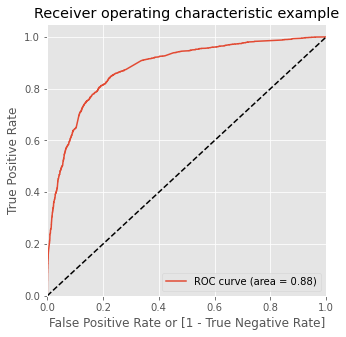

In [60]:
# Calling the roc curve for plotting
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

#### - The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
#### - The area under the curve is 88% of the total area.

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [61]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0


### Checking the possibility using 'Accuracy', 'Sensitivity' and 'Specificity'

In [62]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs
# Creating a dataframe to store all the values to be created
df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])
# from 0 to 0.9 with set size 0.1
var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   
for i in var:
    # Creating confusion matrix 
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  
    # Taking the sum of the matrix
    total=sum(sum(cm_matrix))                                                          
    # Storing Accuracy Data 
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     
    # Storing Sensitivity Data
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         
    # Storing Specificity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         
    # Inserting all the data into the dataframe created earlier
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          
# Printing the data
print(df_cutoffs)

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.431973    0.995539     0.084708
0.1          0.1  0.559833    0.974453     0.304348
0.2          0.2  0.690012    0.940795     0.535482
0.3          0.3  0.787879    0.864558     0.740630
0.4          0.4  0.809524    0.793998     0.819090
0.5          0.5  0.802257    0.646796     0.898051
0.6          0.6  0.784477    0.532036     0.940030
0.7          0.7  0.750618    0.393350     0.970765
0.8          0.8  0.718615    0.287510     0.984258
0.9          0.9  0.682127    0.173966     0.995252


####  After creating point for accuracy, sensitivity and specificity for all probability points from 0 to 0.9 we choose cutoff point = 0.4 as all three values are near to similar  so we consider it our ideal point.

#### Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'.

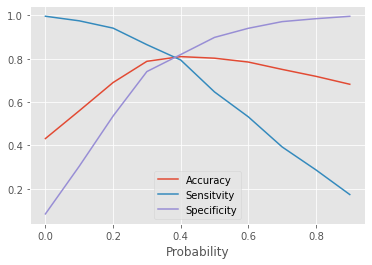

In [63]:
# Plotting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).
# Line Plotting
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   
plt.show()

#### From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is 0.40. We can see that there is a trade off between sensitivity and specificity.

In [64]:
#Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset
#Predicted value
y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )   
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0,0


## Precision and Recall

#### Creating Precision and Recall using confusion matrix

In [65]:
#Creating confusion matrix to find precision and recall score
confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3278,  724],
       [ 508, 1958]], dtype=int64)

In [66]:
#Printing Precision score
print('Precision:',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))   
# Printing Recall score
print('Recall:',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       

Precision: 0.7300521998508576
Recall: 0.7939983779399837


#### - The precision percentage is approx 73% and recall percentage is approx 79%.
#### - Our Model is pretty good and explains relevancy of 73% and true relevant results of about 79%.

### Precision and Recall Tradeoff

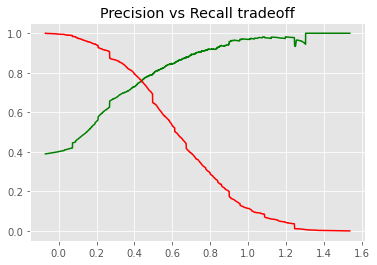

In [67]:
#Creating precision recall curve by creating three points and plotting
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
#Plotting precision
plt.plot(thresholds, p[:-1], "g-")    
#Plotting Recall
plt.plot(thresholds, r[:-1], "r-")    
plt.show()

#### There is a trade off between Precision and Recall and the meeting point is nearly at 0.5

### RFE Test-2

In [68]:
# Running RFE with variables 15
rfem2= RFE(logreg, 15)
rfem2= rfem2.fit(X_train,y_train)
rfem2.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [69]:
#Selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model
col2=X_train.columns[rfem2.support_]
#Adding constant
X_train_rfe2=sm.add_constant(X_train[col2])

In [70]:
#Creating 1st model after RFE
logis_rfe2=sm.GLM(y_train,X_train_rfe2,family=sm.families.Binomial())
reg_rfe2=logis_rfe2.fit()
reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.8
Date:                Sun, 16 Jan 2022   Deviance:                       5493.6
Time:                        23:44:23   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2894      0.065      4.473      0.000       0.163       0.416
Do Not Email                                            -1.3263      0.190     -6.973      0.000      -1.699      -0.954
Total Time Spent on Website                              0.9265      0.035     26.714      0.000       0.859       0.994
Lead Origin_Lead Add Form                                3.3839      0.186     18.172      0.000       3.019       3.749
Lead Source_Welingak website                             1.9606      0.743      2.638      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1618      0.221     -5.263      0.000      -1.594      -0.729
Last Activity_Email Bounced                             -1.0321      0.336     -3.068      0.002      -1.691      -0.373
Last Activity_Olark Chat Conversation                   -0.7956      0.191     -4.168      0.000      -1.170      -0.421
What is your current occupation_Housewife               22.7265    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
What is your current occupation_Working Professional     2.7547      0.187     14.755      0.000       2.389       3.121
Last Notable Activity_Email Link Clicked                -1.7558      0.274     -6.403      0.000      -2.293      -1.218
Last Notable Activity_Email Opened                      -1.2958      0.085    -15.159      0.000      -1.463      -1.128
Last Notable Activity_Had a Phone Conversation           1.8669      1.091      1.711      0.087      -0.272       4.005
Last Notable Activity_Modified                          -1.6631      0.098    -17.055      0.000      -1.854      -1.472
Last Notable Activity_Olark Chat Conversation           -1.3184      0.370     -3.568      0.000      -2.043      -0.594
Last Notable Activity_Page Visited on Website           -1.6038      0.187     -8.582      0.000      -1.970      -1.238
========================================================================================================================
"""

#### We will remove some features which have high p-value and so are insignificant and continue to build new models so that all the features attain significant p-value

## Calculating VIF

In [71]:
#Creating vif dataframe
vif=pd.DataFrame()
#Adding same features as the x_train dataset have
vif['Features']=X_train_rfe2[col2].columns  
# Calculating VIFs
vif['VIF']=[variance_inflation_factor(X_train_rfe2[col2].values,i) for i in range(X_train_rfe2[col2].shape[1])]
# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)
# Sorting the vif values
vif=vif.sort_values(by='VIF',ascending=False)
# Viewing the dataset
vif

,Features,VIF
12,Last Notable Activity_Modified,1.85
0,Do Not Email,1.81
5,Last Activity_Email Bounced,1.79
6,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.24
4,Last Activity_Converted to Lead,1.23
8,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09


#### We can observe after calculating VIF that all the values are less than 5 so multicollinearity does not exist in the dataset.

In [72]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant
X_train_rfe22=X_train_rfe2.drop(['const','What is your current occupation_Housewife'],1)

In [73]:
# Creating a new model
# Adding constant
X_train_rfe22=sm.add_constant(X_train_rfe22)
# Using GLM, creating model
logis_rfe22=sm.GLM(y_train,X_train_rfe22,families=sm.families.Binomial())
# Fitting our model
reg_rfe22=logis_rfe22.fit()
# Showing the summary of the model created
reg_rfe22.summary()                             

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14139
Method:                          IRLS   Log-Likelihood:                -2843.8
Date:                Sun, 16 Jan 2022   Deviance:                       912.40
Time:                        23:44:23   Pearson chi2:                     912.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5318      0.010     52.675      0.000       0.512       0.552
Do Not Email                                            -0.1751      0.023     -7.651      0.000      -0.220      -0.130
Total Time Spent on Website                              0.1654      0.005     33.650      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5120      0.020     25.722      0.000       0.473       0.551
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1432      0.024     -5.917      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0590      0.033     -1.794      0.073      -0.124       0.005
Last Activity_Olark Chat Conversation                   -0.0713      0.020     -3.640      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3447      0.018     18.882      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.2886      0.036     -8.041      0.000      -0.359      -0.218
Last Notable Activity_Email Opened                      -0.2239      0.013    -17.373      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2339      0.114      2.056      0.040       0.011       0.457
Last Notable Activity_Modified                          -0.2796      0.014    -20.409      0.000      -0.306      -0.253
Last Notable Activity_Olark Chat Conversation           -0.2610      0.040     -6.470      0.000      -0.340      -0.182
Last Notable Activity_Page Visited on Website           -0.2784      0.027    -10.501      0.000      -0.330      -0.226
========================================================================================================================
"""

#### Now, Last Activity_Email Bounced has high p-value we need to drop it.

In [74]:
# Dropping the most insignificant values ('Last Activity_Email Bounced') and constant
X_train_rfe23=X_train_rfe22.drop(['const','Last Activity_Email Bounced'],1)

In [75]:
# Creating a new model
# Adding constant
X_train_rfe23=sm.add_constant(X_train_rfe23)
# Using GLM, creating model
logis_rfe23=sm.GLM(y_train,X_train_rfe23,families=sm.families.Binomial())
# Fitting our model
reg_rfe23=logis_rfe23.fit()
# Showing the summary of the model created
reg_rfe23.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14144
Method:                          IRLS   Log-Likelihood:                -2845.4
Date:                Sun, 16 Jan 2022   Deviance:                       912.86
Time:                        23:44:23   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5328      0.010     52.830      0.000       0.513       0.553
Do Not Email                                            -0.2002      0.018    -11.041      0.000      -0.236      -0.165
Total Time Spent on Website                              0.1653      0.005     33.628      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5124      0.020     25.738      0.000       0.473       0.551
Lead Source_Welingak website                             0.1922      0.044      4.385      0.000       0.106       0.278
Last Activity_Converted to Lead                         -0.1401      0.024     -5.802      0.000      -0.187      -0.093
Last Activity_Olark Chat Conversation                   -0.0674      0.019     -3.461      0.001      -0.106      -0.029
What is your current occupation_Working Professional     0.3449      0.018     18.890      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2895      0.036     -8.063      0.000      -0.360      -0.219
Last Notable Activity_Email Opened                      -0.2248      0.013    -17.454      0.000      -0.250      -0.200
Last Notable Activity_Had a Phone Conversation           0.2330      0.114      2.047      0.041       0.010       0.456
Last Notable Activity_Modified                          -0.2836      0.014    -20.970      0.000      -0.310      -0.257
Last Notable Activity_Olark Chat Conversation           -0.2646      0.040     -6.567      0.000      -0.344      -0.186
Last Notable Activity_Page Visited on Website           -0.2757      0.026    -10.414      0.000      -0.328      -0.224
========================================================================================================================
"""

#### Now, Last Notable Activity_Had a Phone Conversation Bounced has high p-value we need to drop it.

In [76]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant
X_train_rfe24=X_train_rfe23.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [77]:
# Creating a new model
# Adding constant
X_train_rfe24=sm.add_constant(X_train_rfe24)
# Using GLM, creating model
logis_rfe24=sm.GLM(y_train,X_train_rfe24,families=sm.families.Binomial())
# Fitting our model
reg_rfe24=logis_rfe24.fit()
# Showing the summary of the model created
reg_rfe24.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.14151
Method:                          IRLS   Log-Likelihood:                -2847.5
Date:                Sun, 16 Jan 2022   Deviance:                       913.45
Time:                        23:44:24   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5344      0.010     53.150      0.000       0.515       0.554
Do Not Email                                            -0.2008      0.018    -11.072      0.000      -0.236      -0.165
Total Time Spent on Website                              0.1653      0.005     33.634      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5117      0.020     25.699      0.000       0.473       0.551
Lead Source_Welingak website                             0.1923      0.044      4.384      0.000       0.106       0.278
Last Activity_Converted to Lead                         -0.1402      0.024     -5.808      0.000      -0.188      -0.093
Last Activity_Olark Chat Conversation                   -0.0675      0.019     -3.466      0.001      -0.106      -0.029
What is your current occupation_Working Professional     0.3452      0.018     18.903      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2910      0.036     -8.107      0.000      -0.361      -0.221
Last Notable Activity_Email Opened                      -0.2264      0.013    -17.610      0.000      -0.252      -0.201
Last Notable Activity_Modified                          -0.2851      0.014    -21.104      0.000      -0.312      -0.259
Last Notable Activity_Olark Chat Conversation           -0.2661      0.040     -6.603      0.000      -0.345      -0.187
Last Notable Activity_Page Visited on Website           -0.2772      0.026    -10.475      0.000      -0.329      -0.225
========================================================================================================================
"""

### Creating VIF
#### Now, from the above summary we can say that all the variables present in this model are significant as no variables is having p - value greater than 5% hence we can proceed with our next step

In [78]:
# Checking VIF
# Dropping constant and saving in new dataset
X_train_rfe0=X_train_rfe24.drop('const',1)
# Creating new VIF DataFrame
vif=pd.DataFrame()
# Adding final train dataset features
vif['Features']=X_train_rfe0.columns
# Now calculating
vif['VIF']=[variance_inflation_factor(X_train_rfe0.values,i) for i in range(X_train_rfe0.shape[1])]
# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)
# Sorting the vif dataset
vif=vif.sort_values(by='VIF',ascending=False)
# Viewing the dataset
vif

,Features,VIF
9,Last Notable Activity_Modified,1.80
5,Last Activity_Olark Chat Conversation,1.76
2,Lead Origin_Lead Add Form,1.40
10,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.23
4,Last Activity_Converted to Lead,1.22
0,Do Not Email,1.13
6,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09
8,Last Notable Activity_Email Opened,1.03


#### As confirmed earlier, no sign of multicollinearity shown from above VIF dataframe hence reg_rfe24 is our final model and we are going to use it predict the X train dataset.

### Predicting in Train Model

In [79]:
# Predicting the train dataset with our final model - rfe with 15 variables
y_train_pred1=reg_rfe24.predict(X_train_rfe24)
# Creating a new dataset and saving predicted values in it
y_train_pred_final2=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred1,'ID':y_train.index})
# viewing first 5 rows
y_train_pred_final2.head()   

,Converted,Converted_probability,ID
1871,0,0.161631,1871
6795,0,0.308956,6795
3516,0,0.193698,3516
8105,0,0.760135,8105
3934,0,0.102970,3934


### ROC Curve Plotting

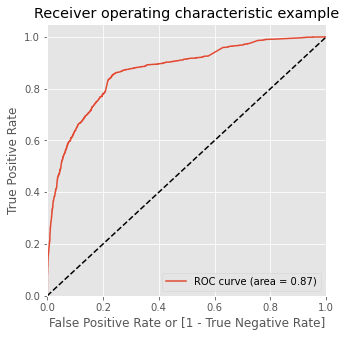

In [80]:
# Calling the roc curve function for plotting
draw_roc(y_train_pred_final2.Converted, y_train_pred_final2.Converted_probability)

#### - The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
#### - The area under the curve is 87% of the total area.

## Conclusion from RFE Test - I and Test - II
- For Test - I, we saw that the auc score is 0.88 in ROC curve plot.
- For Test - II, we saw that the auc score is 0.87 in ROC curve plot.

#### AUC measures how true postive rates and false positive rates trade-off. It tells the model stability. The larger the area, more our model will be able to distinguish classes. The model created by RFE test - 1 is the better model or stable model than 2. 

## Predicting the test dataset
### Scaling the Test dataset

In [81]:
# Scaling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

### Predicting

In [82]:
# Taking the same column train set has
test_cols=X_train_4.columns[1:]              
# Updating it in the final test set
X_test_final=X_test[test_cols]
# Adding constant to the final set
X_test_final=sm.add_constant(X_test_final)
# Predicting the final test set
y_pred_test=reg4.predict(X_test_final)

In [83]:
# Creating a new dataset and saving the prediction values in it
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})
# Viewing first 5 rows
y_test_pred_final.head()

,Converted,Converted_Probability,ID
4269,1,0.650203,4269
2376,1,0.899467,2376
7766,1,0.735555,7766
9199,0,0.072559,9199
4359,1,0.672628,4359


## Model Evaluation

In [84]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.650203,4269,1
2376,1,0.899467,2376,1
7766,1,0.735555,7766,1
9199,0,0.072559,9199,0
4359,1,0.672628,4359,1


In [85]:
# Checking the accuracy of the test dataset.
# Printing the score
print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Accuracy score in predicting test dataset : 0.8152958152958153


In [86]:
# Printing the precision score
print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))
# Printing the recall score
print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Precision score in predicting test dataset: 0.7541412380122058
Recall score in predicting test dataset: 0.7899543378995434


## Lead Score Assignment

In [87]:
# Creating new columns for lead number and lead score
y_test_pred_final['Lead Number']=leads.iloc[y_test_pred_final['ID'],1]
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.650203,4269,1,0,65
2376,1,0.899467,2376,1,0,90
7766,1,0.735555,7766,1,0,74
9199,0,0.072559,9199,0,0,7
4359,1,0.672628,4359,1,0,67


# Conclusion

- We have higher recall score than precision score.
- The Accuracy, Precision and Recall are in acceptable range.
- The model has the ability to adjust to company's upcoming requirements.
- Model is in stable state.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are : <br>
    i) Last Notable Activity_Had a Phone Conversation <br>
    ii) Lead Origin_Lead Add Form and <br>
    iii) What is your current occupation_Working Professional